In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data=pd.read_csv('/content/drive/MyDrive/LHC_training.csv')
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


 **Exploratory data analysis**

In [ ]:
# List of features
features = []
for i in data:
  features.append(i)
features

['EventId',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'Weight',
 'Label']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [ ]:
df=data.drop(['EventId'], axis=1) 

duplicate = df[df.duplicated()]

print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label


**Univariate analysis**

In [ ]:
# List of categorical features
cat=[]
for i in data:
  if data[i].nunique() < 15:
    cat.append(i)

cat

['PRI_jet_num', 'Label']

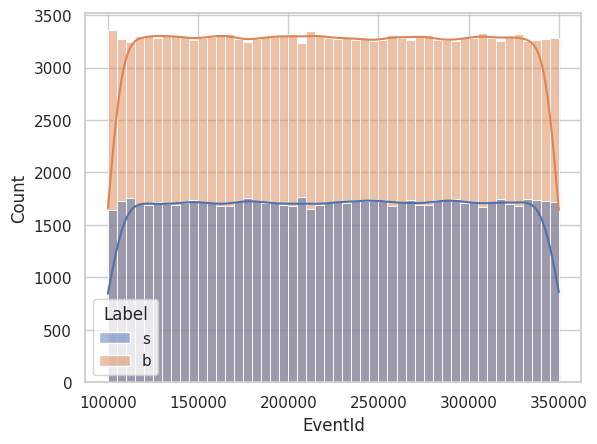

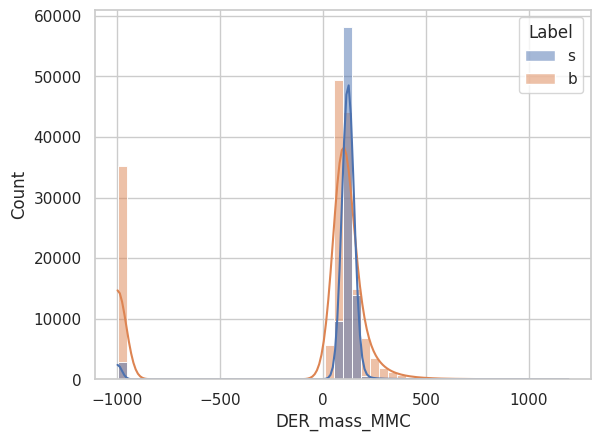

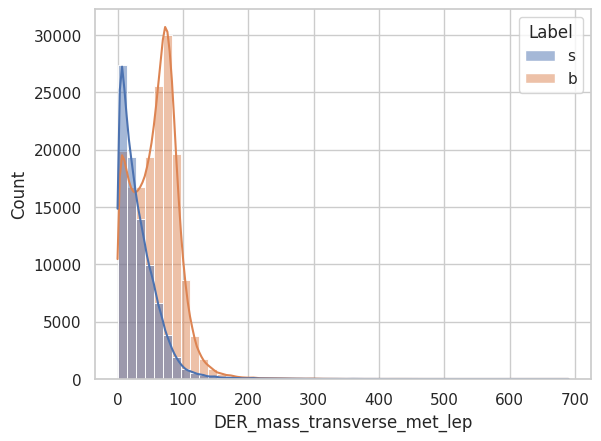

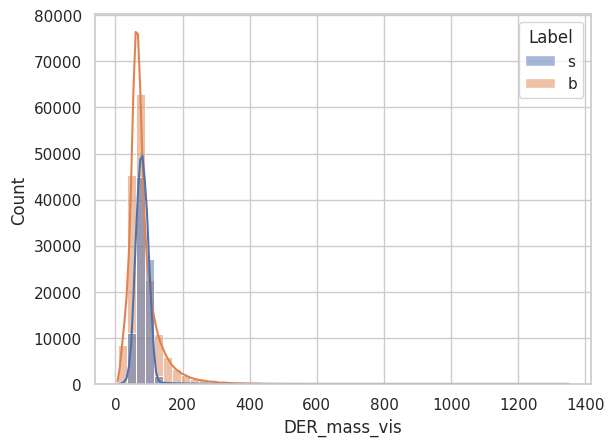

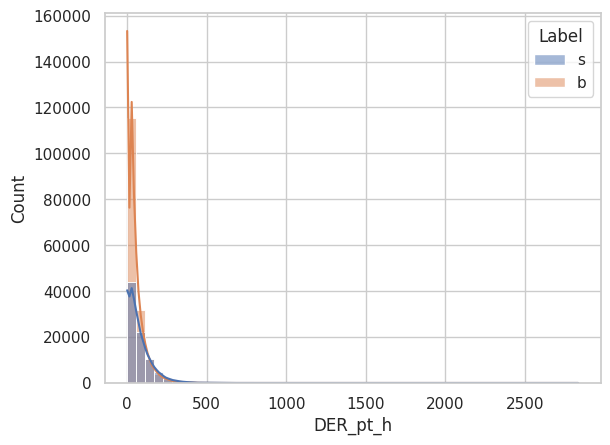

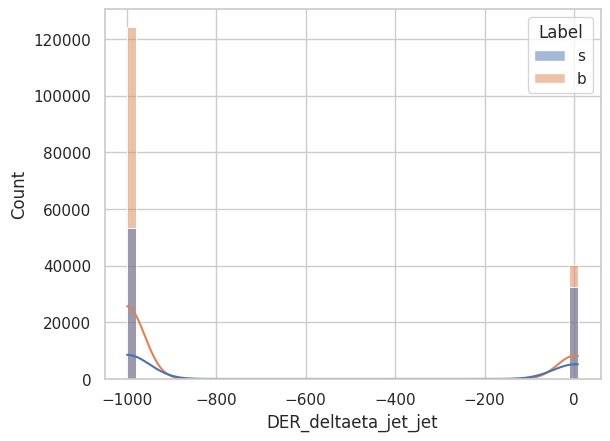

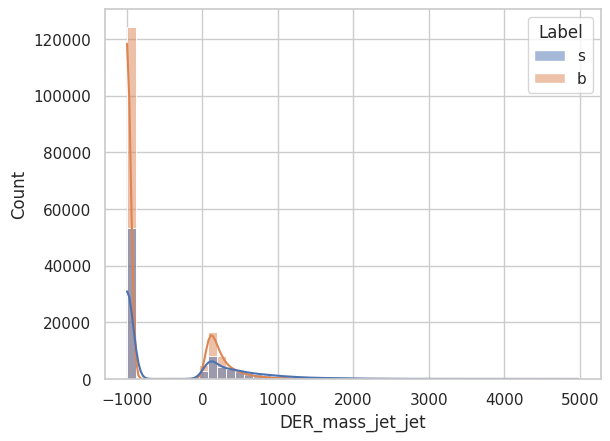

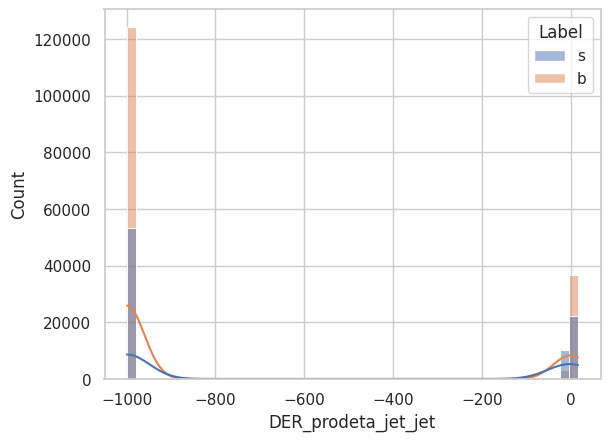

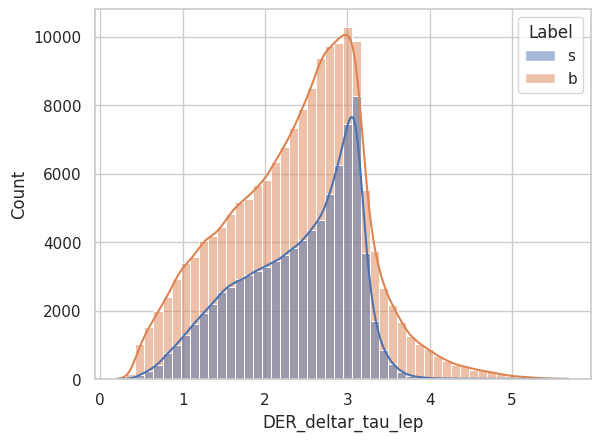

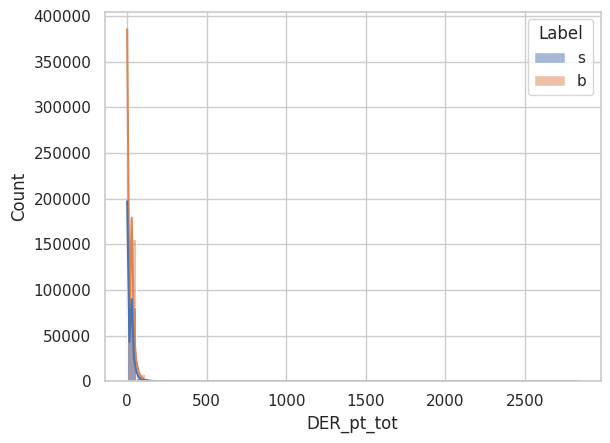

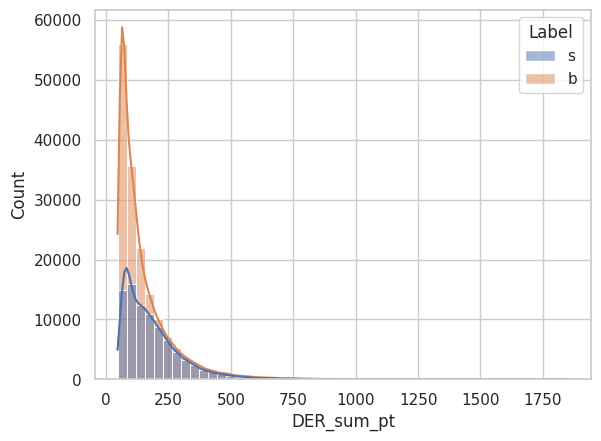

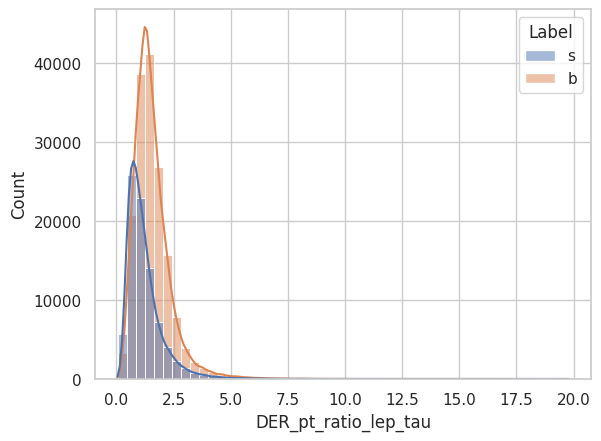

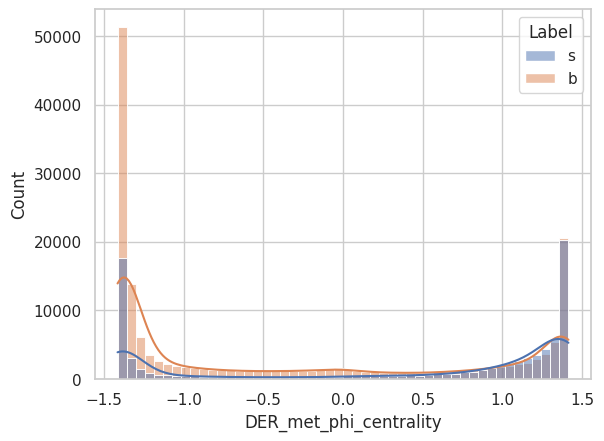

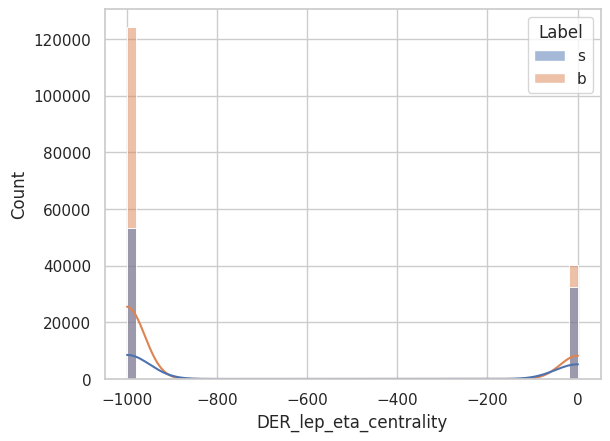

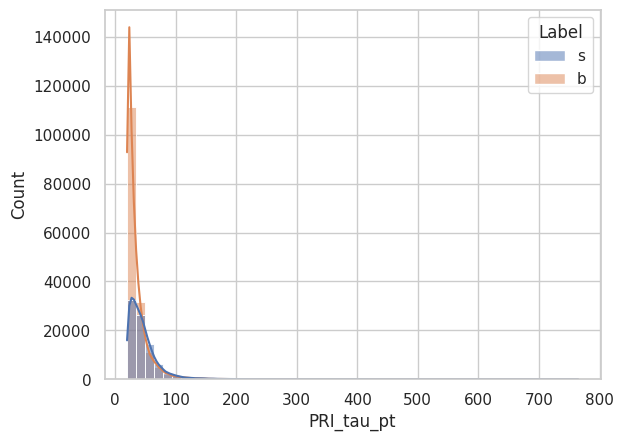

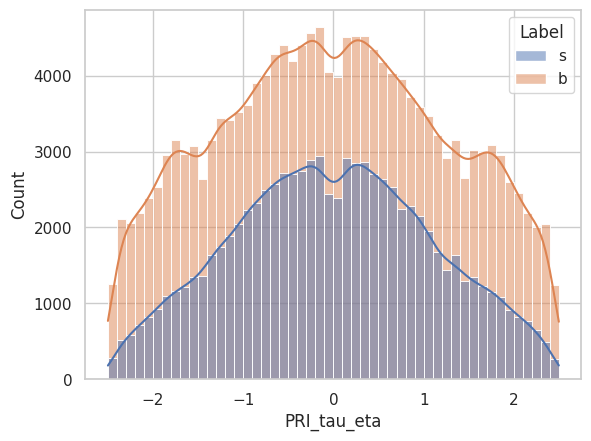

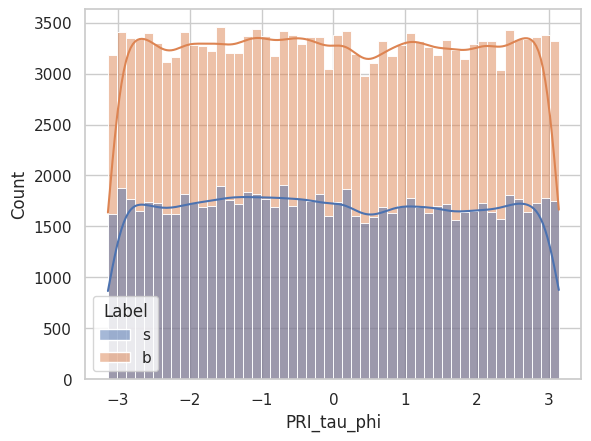

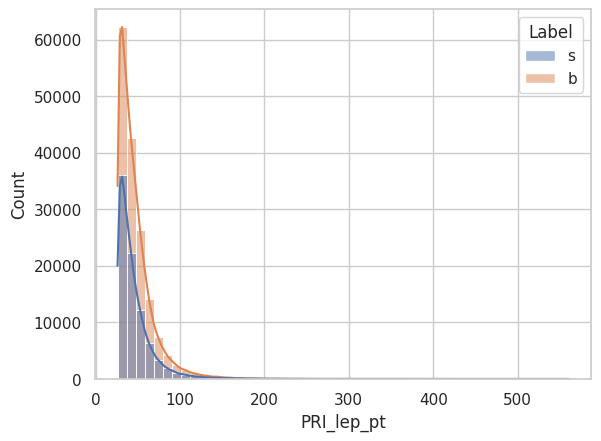

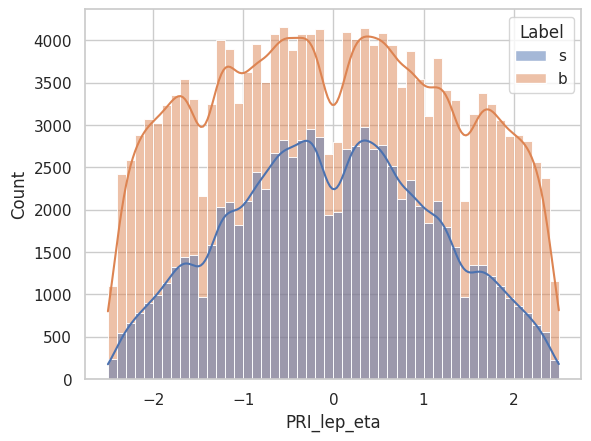

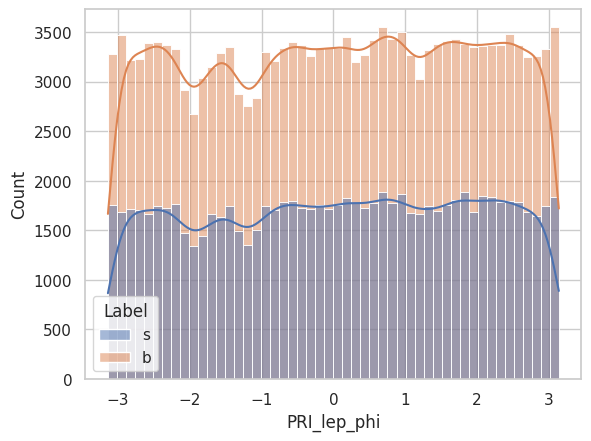

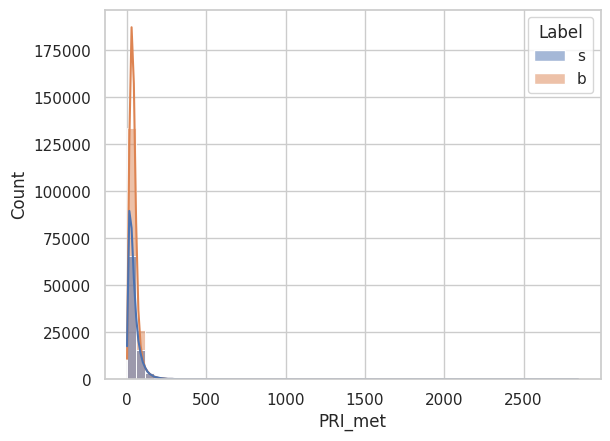

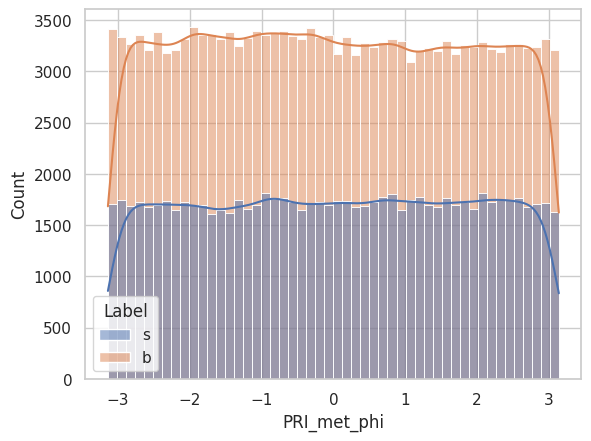

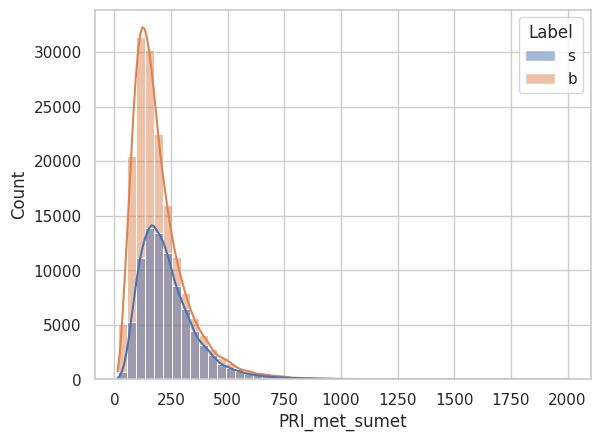

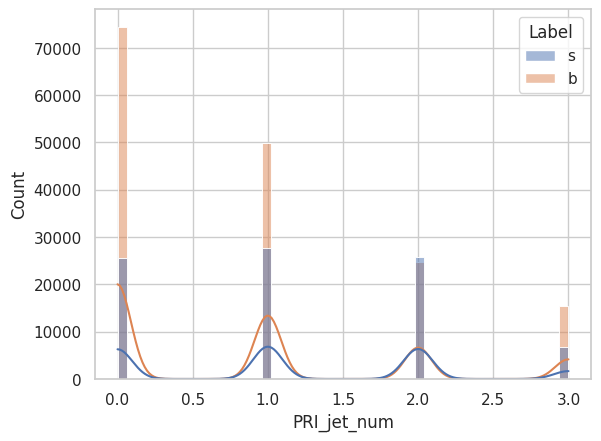

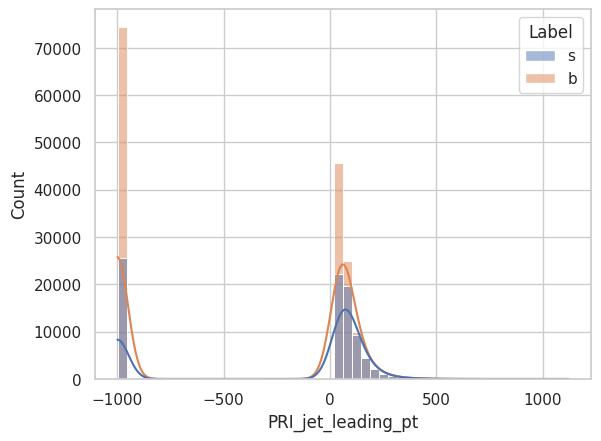

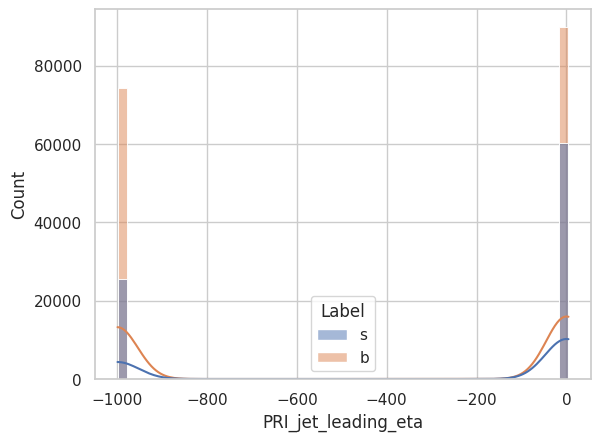

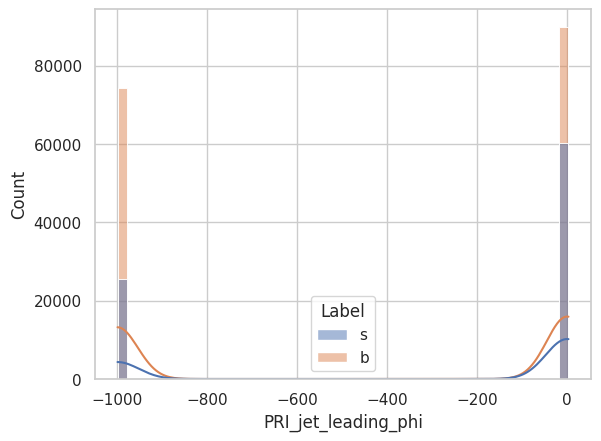

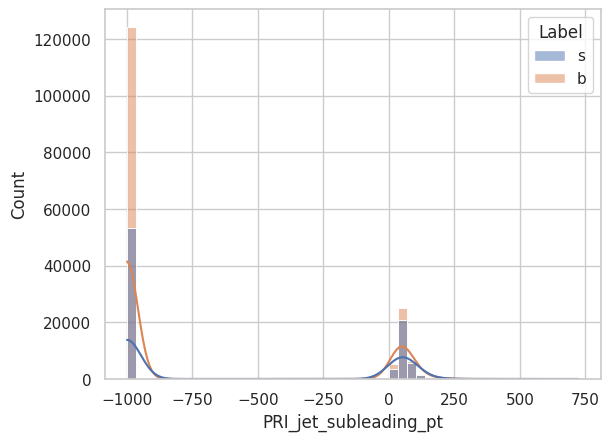

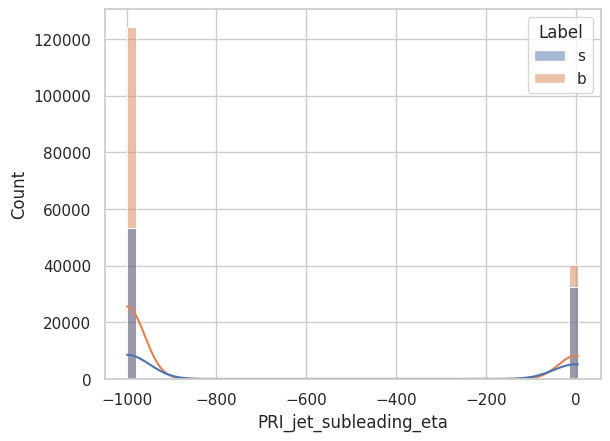

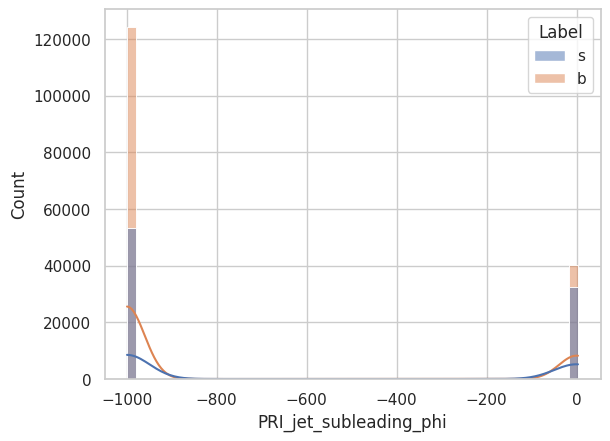

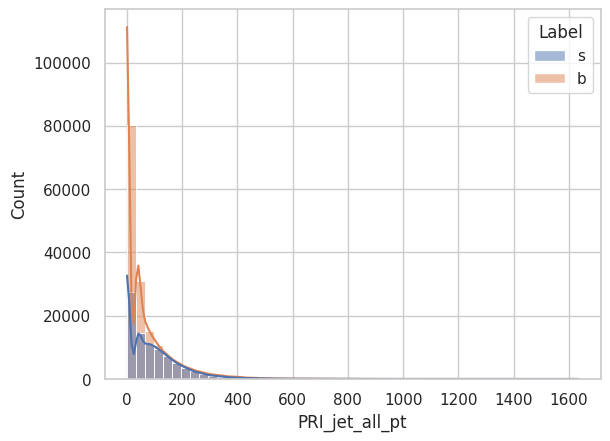

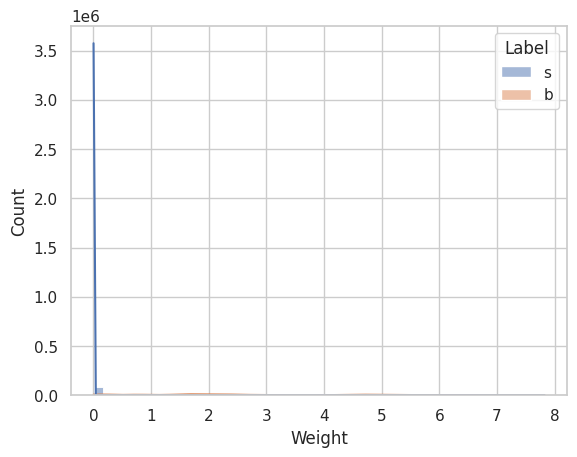

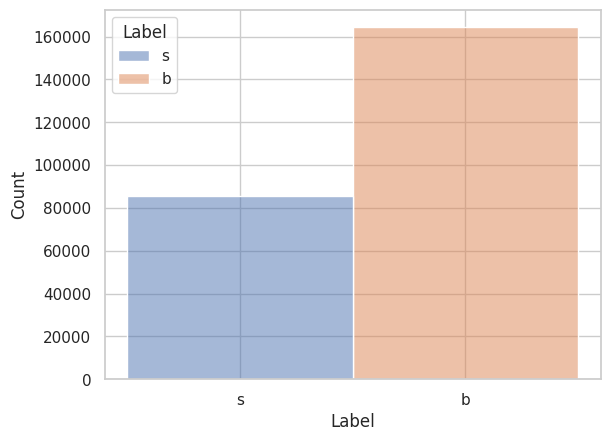

In [ ]:
sns.set_style('whitegrid')
for i in data:
        sns.histplot(x=data[i], kde = True, color ='red', bins = 50, hue=data['Label'])
        plt.show()

In [ ]:
#List of independent features

X_list = []
for i in data:
  if i =='Label':
    continue
  else:
    X_list.append(i)
X_list

['EventId',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'Weight']

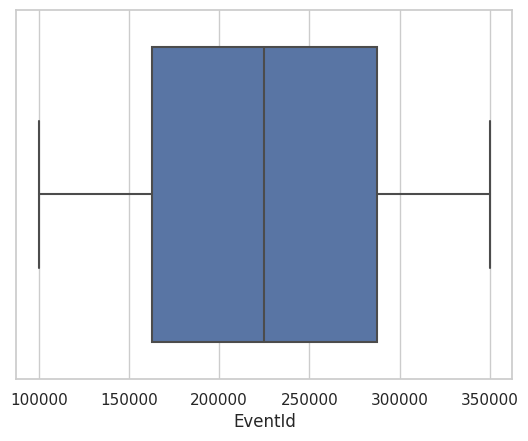

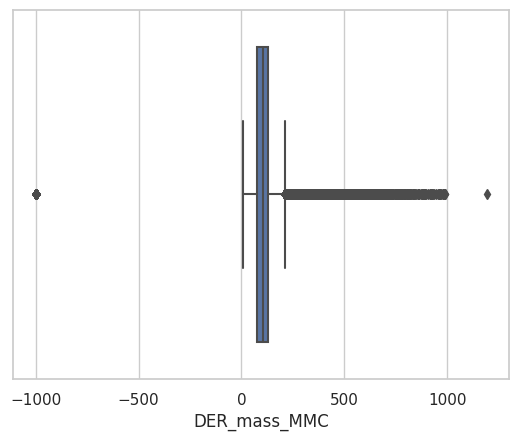

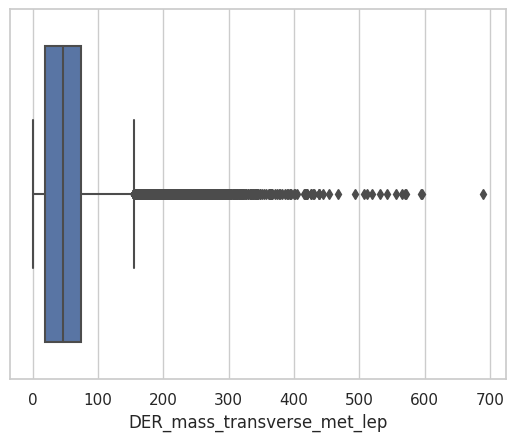

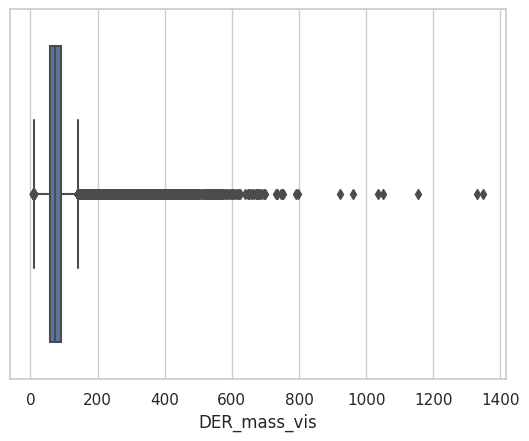

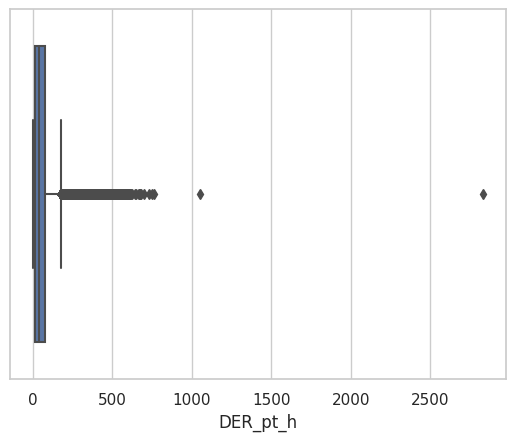

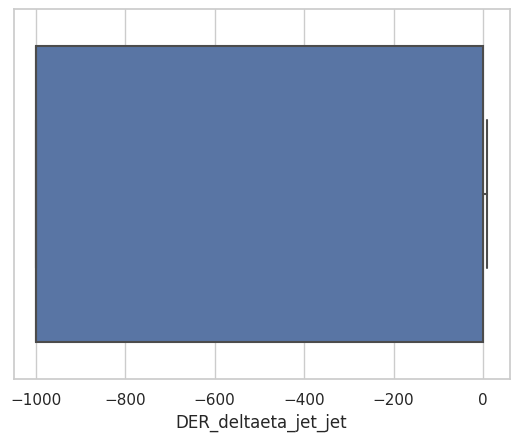

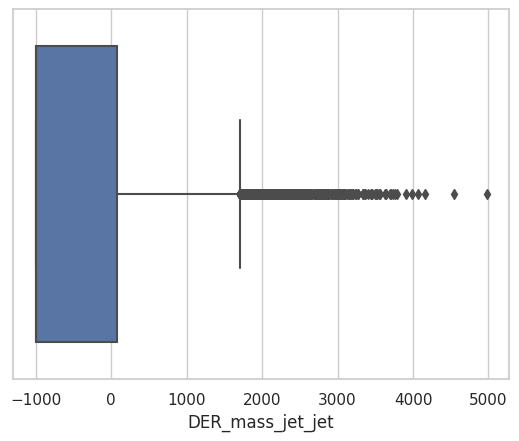

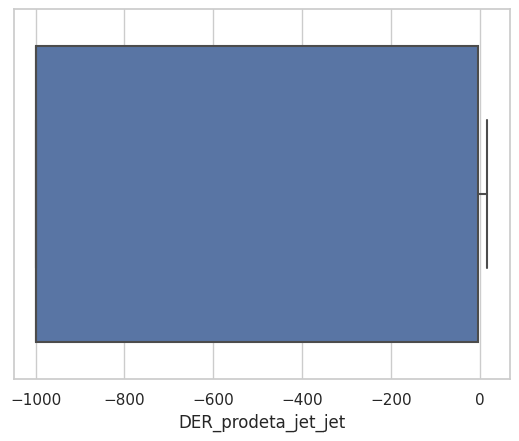

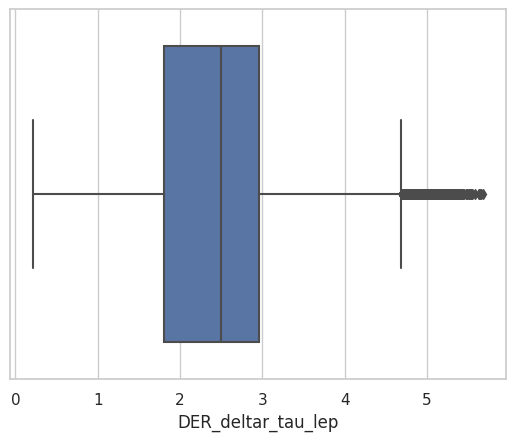

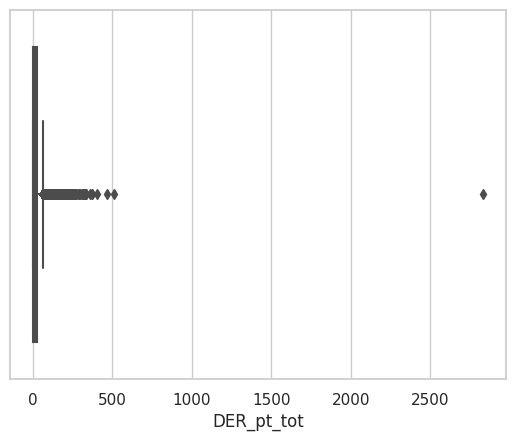

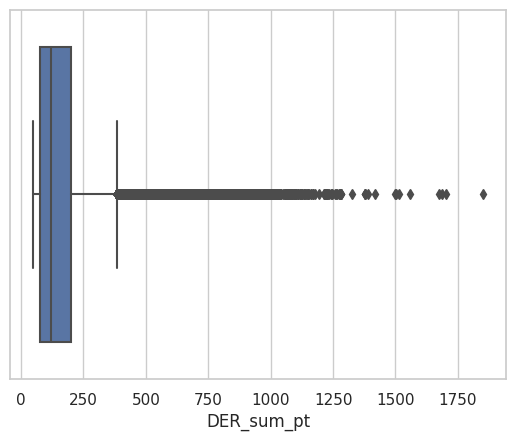

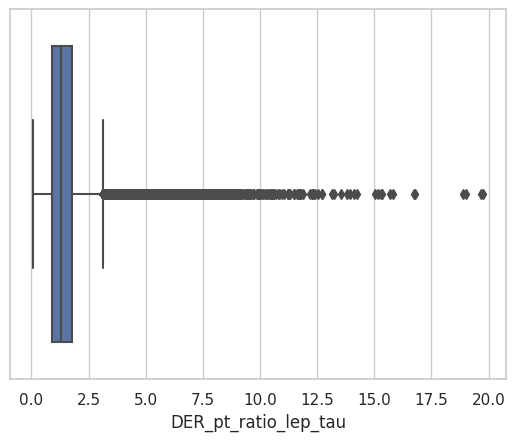

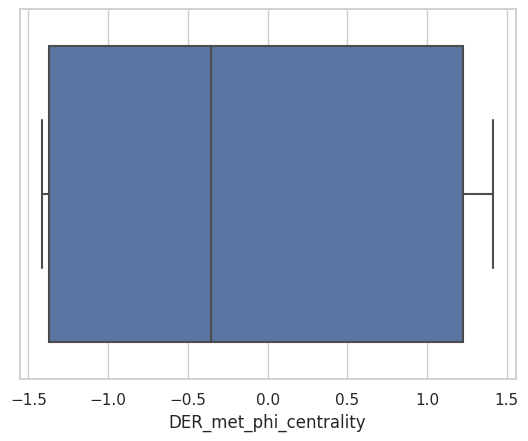

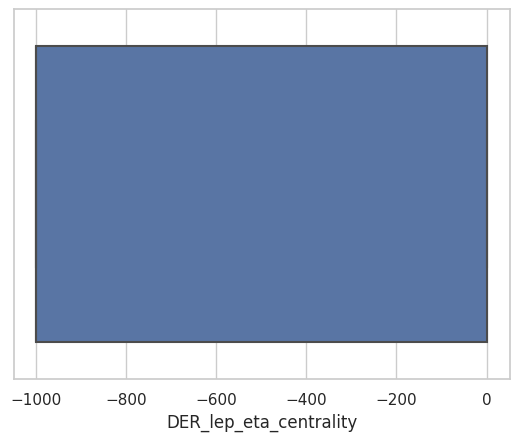

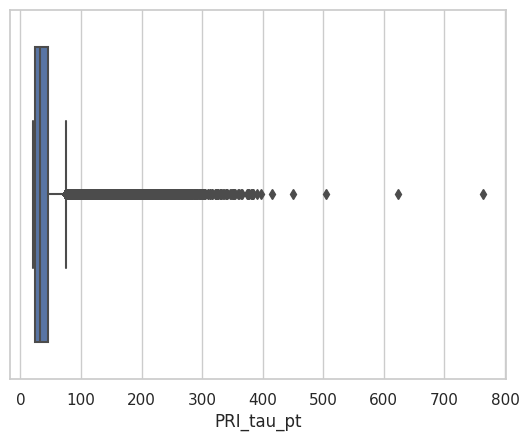

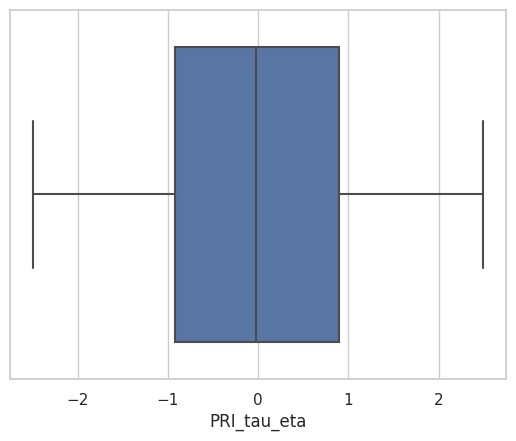

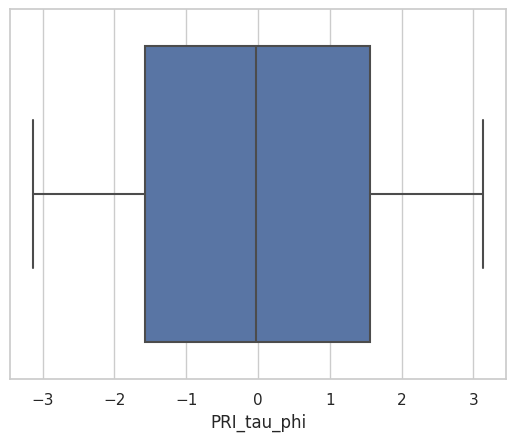

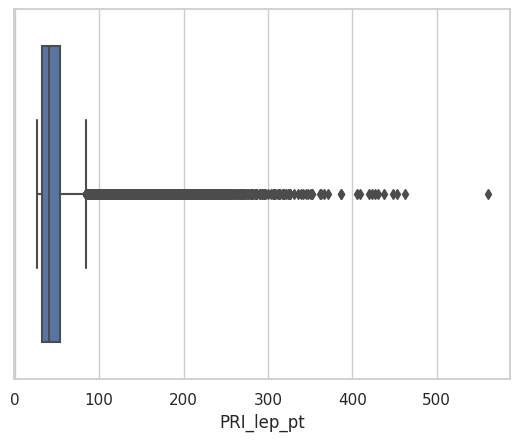

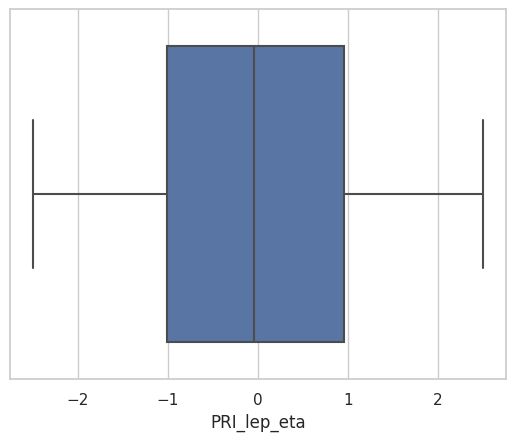

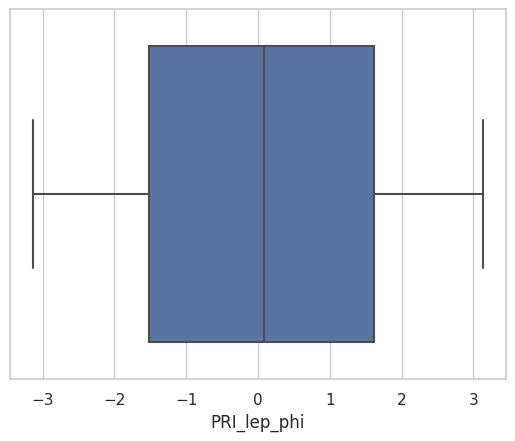

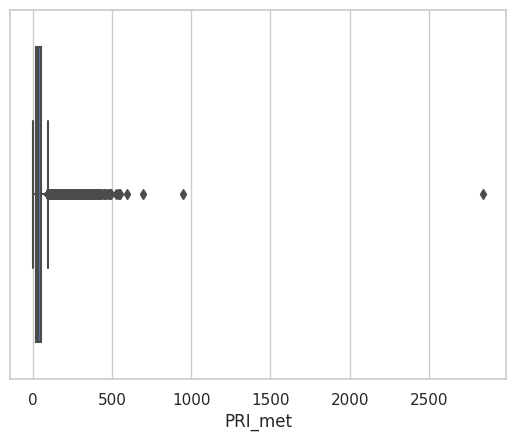

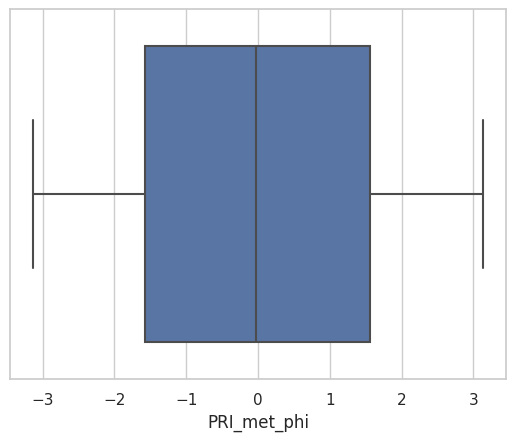

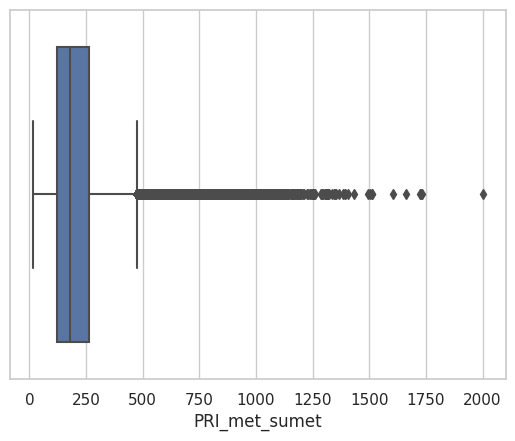

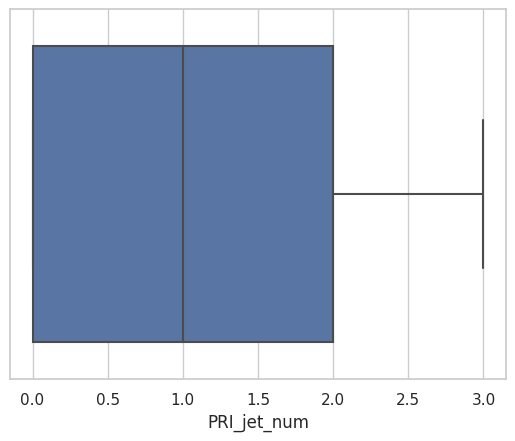

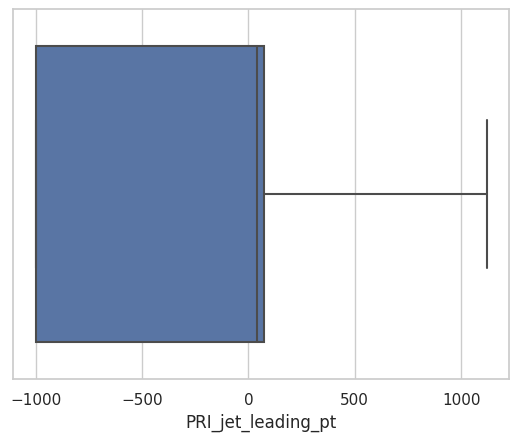

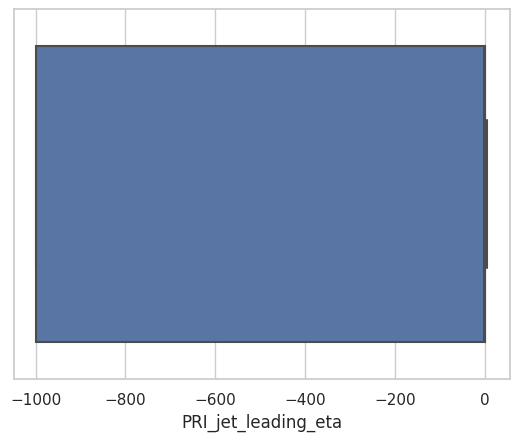

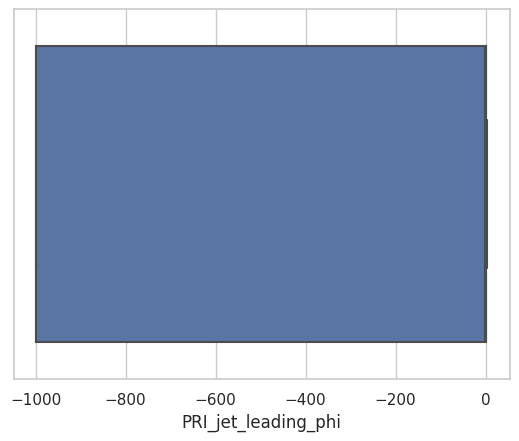

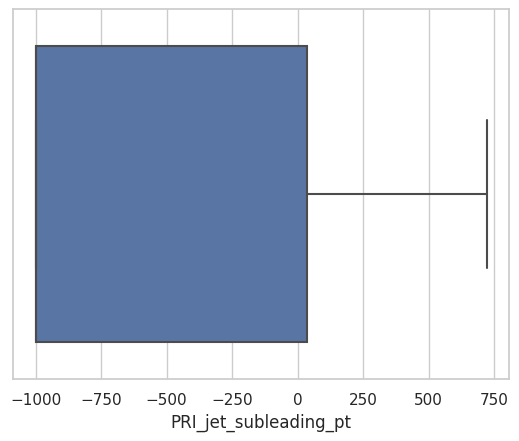

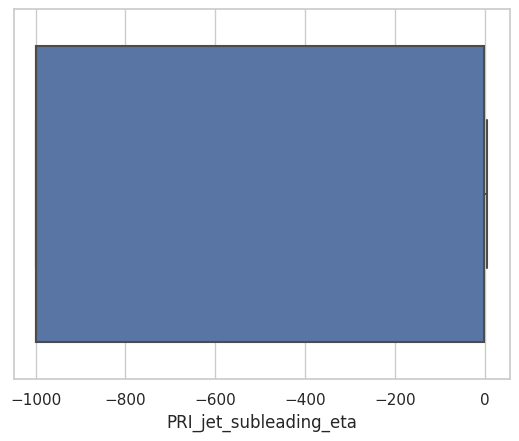

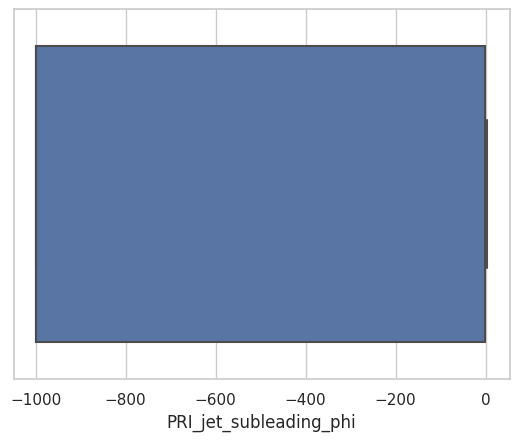

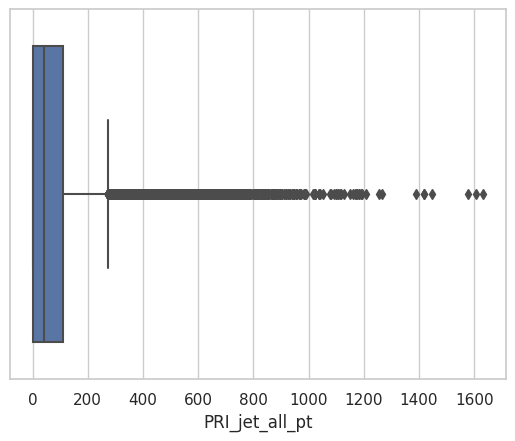

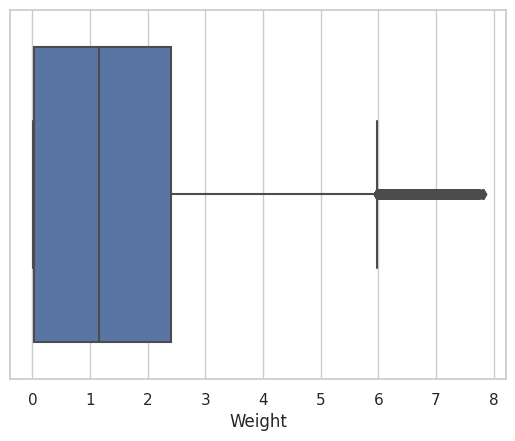

In [ ]:
sns.set(style="whitegrid")
for i in X_list:
     sns.boxplot(x=data[i])
     plt.show()

In [ ]:
data['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

**Multivariate analysis**

In [ ]:
corr=data.corr()
corr

<ipython-input-18-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
EventId,1.000000,0.001917,-0.006059,-0.001851,0.002073,-0.000060,0.000353,-0.000075,-0.001349,-0.000581,...,0.002312,0.000175,0.001396,0.001216,0.001214,-0.000065,-0.000068,-0.000060,0.001024,-0.002838
DER_mass_MMC,0.001917,1.000000,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,0.045826,...,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372,-0.327244
DER_mass_transverse_met_lep,-0.006059,-0.455755,1.000000,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.043251,0.017758,...,-0.167811,-0.210537,-0.229674,-0.220370,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009,0.419843
DER_mass_vis,-0.001851,0.168548,0.190109,1.000000,-0.062562,-0.032251,-0.040620,-0.032126,0.579712,-0.000702,...,0.053300,-0.026860,-0.019151,-0.013749,-0.013742,-0.033188,-0.032202,-0.032206,-0.052902,0.102172
DER_pt_h,0.002073,0.198765,-0.249116,-0.062562,1.000000,0.523664,0.534531,0.523639,-0.539379,0.310501,...,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616,-0.414084
DER_deltaeta_jet_jet,-0.000060,0.162661,-0.176386,-0.032251,0.523664,1.000000,0.946045,0.999981,-0.299076,0.270878,...,0.619100,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446,-0.395375
DER_mass_jet_jet,0.000353,0.160524,-0.190392,-0.040620,0.534531,0.946045,1.000000,0.944443,-0.303751,0.247771,...,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962,-0.394004
DER_prodeta_jet_jet,-0.000075,0.162521,-0.175942,-0.032126,0.523639,0.999981,0.944443,1.000000,-0.299083,0.271435,...,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.712620,-0.395004
DER_deltar_tau_lep,-0.001349,0.228105,0.043251,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1.000000,-0.148081,...,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737,0.197881
DER_pt_tot,-0.000581,0.045826,0.017758,-0.000702,0.310501,0.270878,0.247771,0.271435,-0.148081,1.000000,...,0.448925,0.360409,0.202920,0.186564,0.186590,0.279203,0.271100,0.271091,0.403382,-0.219507


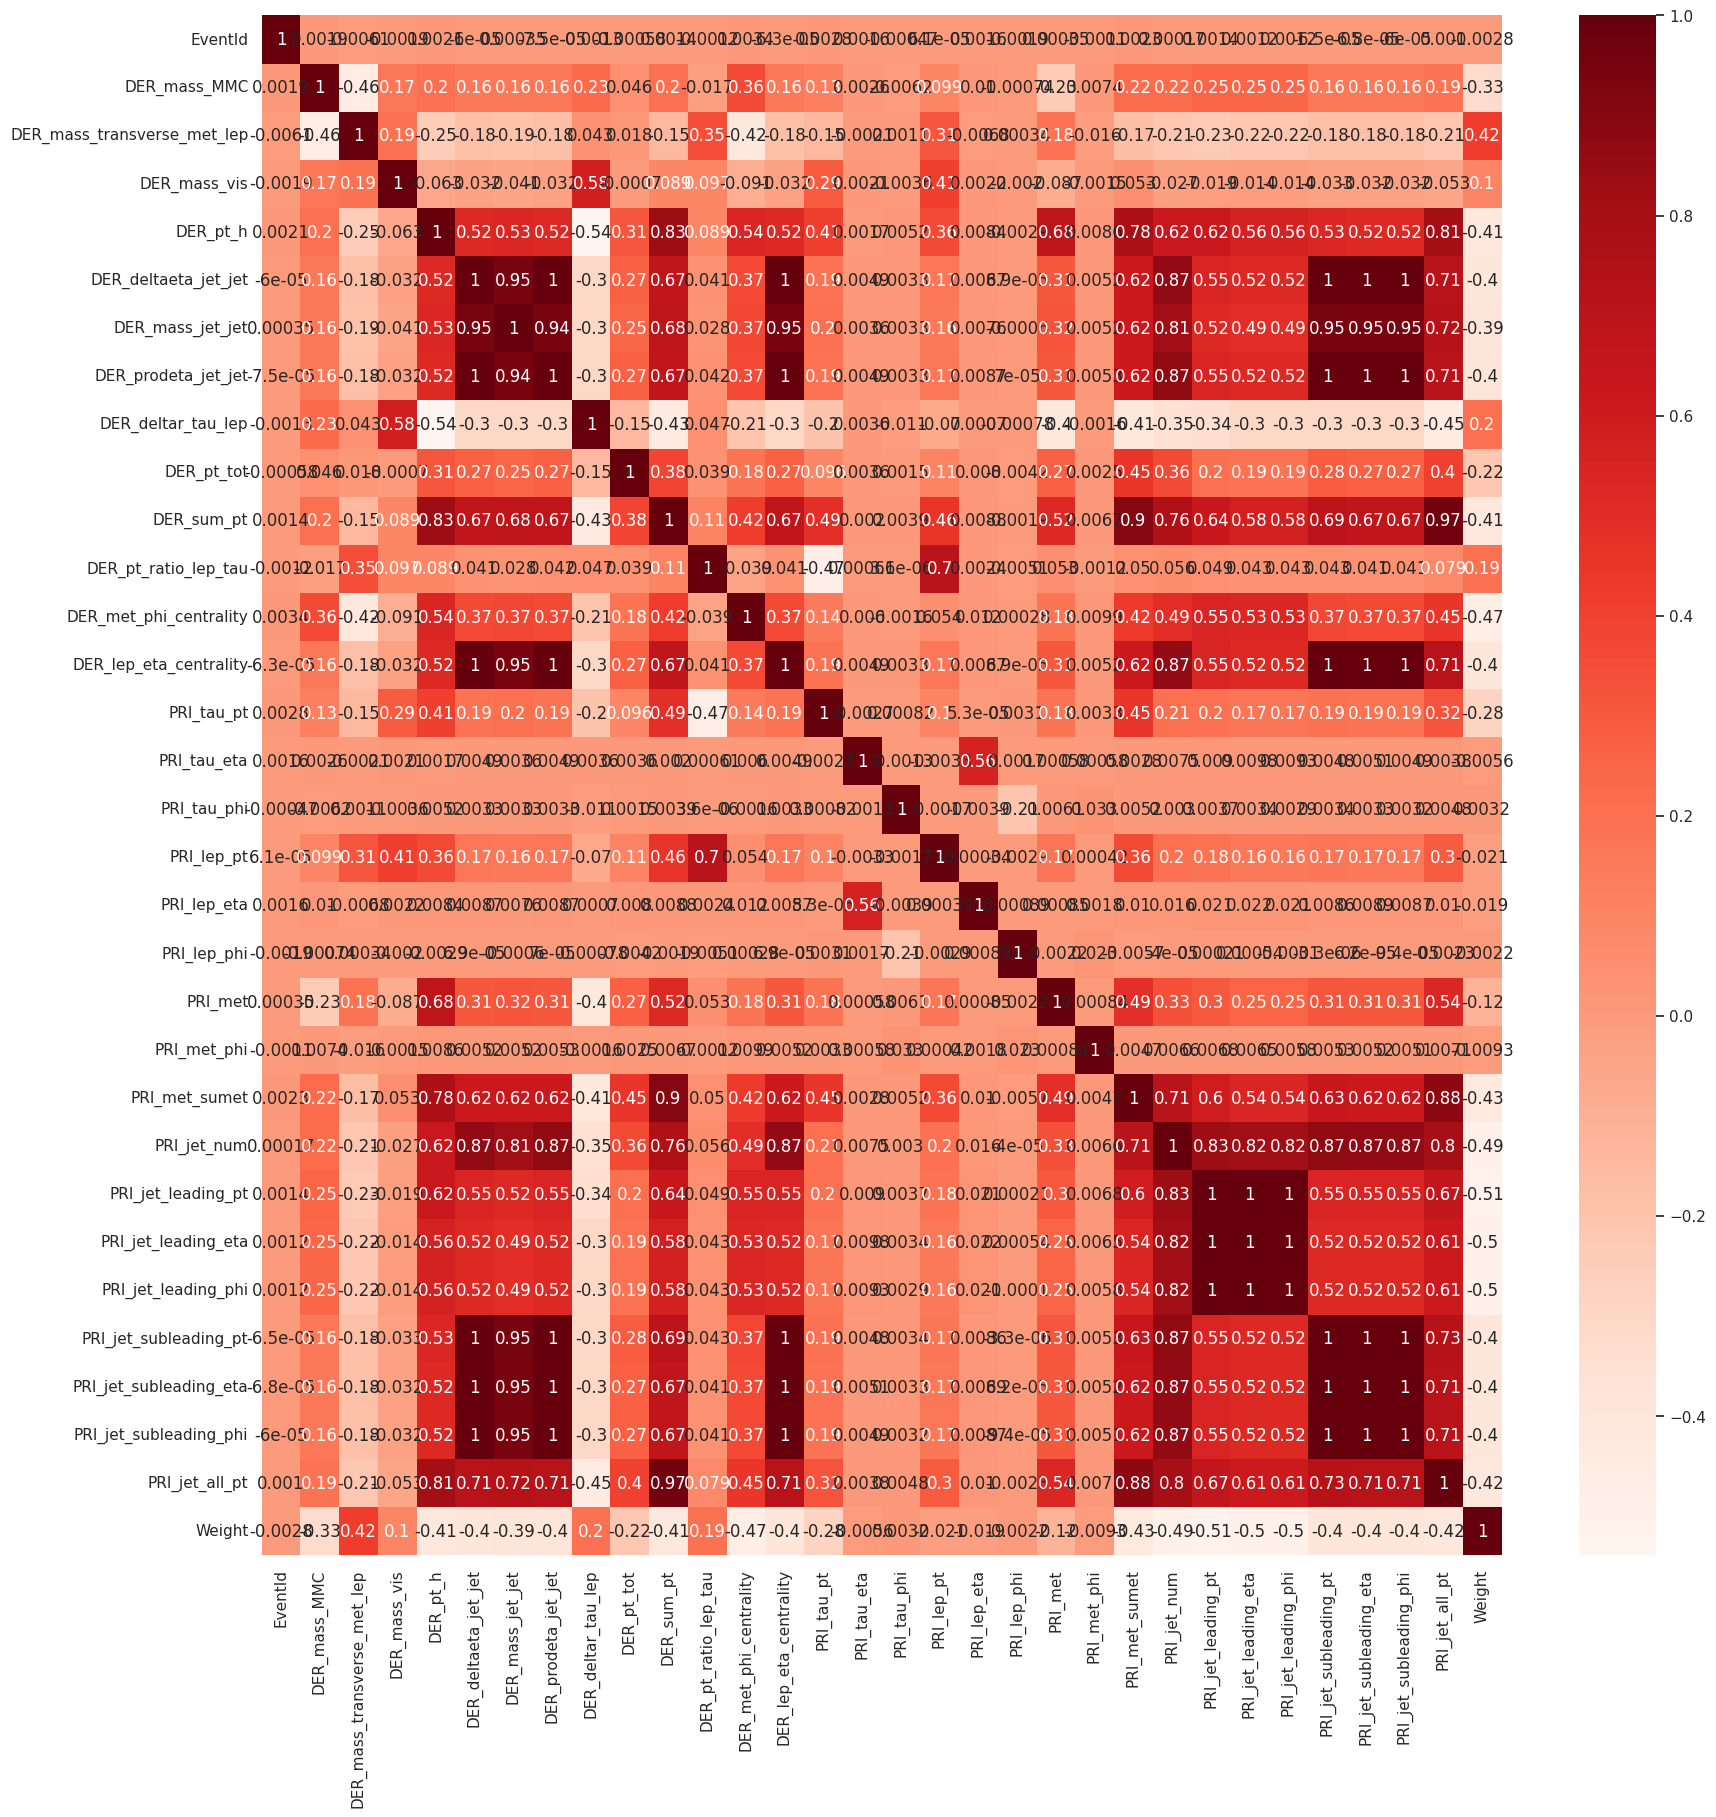

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
pd.crosstab(data.PRI_jet_num, data.Label)

Label,b,s
PRI_jet_num,,
0,74421,25492
1,49834,27710
2,24645,25734
3,15433,6731


In [ ]:
# n(s)/ n(s)+n(b)


print(25492 /(25492+74421))
print(27710/(27710+49834))
print(25734/(25734+24645))
print(6731/(6731+15433))



0.2551419735169598
0.35734550706695556
0.5108080747930686
0.3036906695542321


<Axes: xlabel='PRI_jet_num', ylabel='Label'>

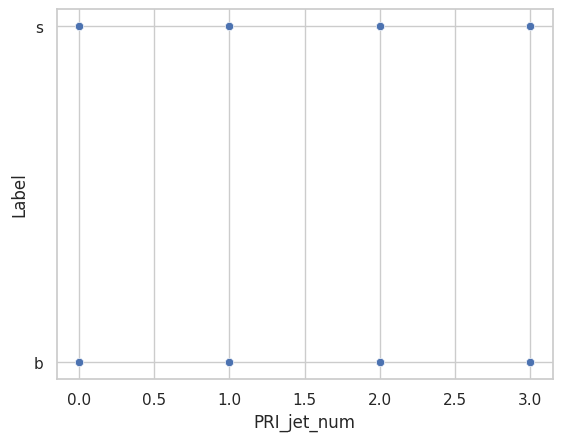

In [ ]:
sns.scatterplot(x=data["PRI_jet_num"], y=data["Label"])

**Observations:**
1.	No null value and duplicate rows are present in data.

2.	There is imbalance in data wrt target feature. Label S occurred 85667 and B occurred 164333 times. (Ratio = 34.267:65.733)

3.	No any independent feature is normally distributed and outliers are present in some features.

4.	Highly correlated features:

     Groups of features having correlation above 0.95 or lesser than -0.95 is as follows:

     i)	'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet', 'DER_lep_eta_centrality'

     ii)	'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi'

     iii)	'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'

     iv)	'PRI_jet_all_pt', 'DER_sum_pt'

5.	One categorical feature is present in dataset 'PRI_jet_num, having categories (0,1,2,3). Probability of S label for category 2 is highest 51%. No direct relation found between categories of this feature and target variable.

6.	Distribution of continuous features wrt categories in target variable is almost similar. Direct conclusion cannot be made.


**Data preprocessing**

In [ ]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


Lts remove following columns:
1. Event ID
2. We will retain only one feature from each group of highly correlated features.

In [41]:
data1=data.copy()
data1=data1.drop( ['EventId', 'DER_mass_jet_jet','DER_prodeta_jet_jet', 'DER_lep_eta_centrality','PRI_jet_leading_eta', 'PRI_jet_leading_phi','PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'], axis=1)
data1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,3.064,41.928,197.760,1.582,1.396,...,-2.414,16.824,-0.277,258.733,2,67.435,46.062,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,3.473,2.078,125.157,0.879,1.414,...,0.103,44.704,-1.916,164.546,1,46.226,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,3.148,9.336,197.814,3.776,1.414,...,1.052,54.283,-2.186,260.414,1,44.251,-999.000,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,-999.00,3.310,0.414,75.968,2.354,-1.285,...,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,-999.00,3.891,16.405,57.983,1.056,-1.385,...,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,0.000,6.245333,b


Label encoding for target variable as s=1, b=0.

In [44]:
data2=data1.copy()
enc_dict = {'b':0,
            's':1
            }

data2['Label'] = data2['Label'].map(enc_dict)


data2.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,3.064,41.928,197.760,1.582,1.396,...,-2.414,16.824,-0.277,258.733,2,67.435,46.062,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,3.473,2.078,125.157,0.879,1.414,...,0.103,44.704,-1.916,164.546,1,46.226,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,3.148,9.336,197.814,3.776,1.414,...,1.052,54.283,-2.186,260.414,1,44.251,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,3.310,0.414,75.968,2.354,-1.285,...,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,3.891,16.405,57.983,1.056,-1.385,...,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,0.000,6.245333,0


In [47]:
#lets convert all independent features datatype to float64
data3=data2.copy()
data3['PRI_jet_num'] = data3['PRI_jet_num'].apply(np.float64)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_deltar_tau_lep           250000 non-null  float64
 6   DER_pt_tot                   250000 non-null  float64
 7   DER_sum_pt                   250000 non-null  float64
 8   DER_pt_ratio_lep_tau         250000 non-null  float64
 9   DER_met_phi_centrality       250000 non-null  float64
 10  PRI_tau_pt                   250000 non-null  float64
 11  PRI_tau_eta                  250000 non-null  float64
 12  PRI_tau_phi                  250000 non-null  float64
 13 

Saving dataset

In [50]:
data3.to_csv('higgs_boson_processed.csv',index=False)

In [51]:
df=pd.read_csv('/content/higgs_boson_processed.csv')
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,3.064,41.928,197.760,1.582,1.396,...,-2.414,16.824,-0.277,258.733,2.0,67.435,46.062,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,3.473,2.078,125.157,0.879,1.414,...,0.103,44.704,-1.916,164.546,1.0,46.226,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,3.148,9.336,197.814,3.776,1.414,...,1.052,54.283,-2.186,260.414,1.0,44.251,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,3.310,0.414,75.968,2.354,-1.285,...,-3.100,31.082,0.060,86.062,0.0,-999.000,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,3.891,16.405,57.983,1.056,-1.385,...,1.569,2.723,-0.871,53.131,0.0,-999.000,-999.000,0.000,6.245333,0
